# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [2]:
#mounting google drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/UNI of Texas Data Sci and BA/Datasets/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
#checking the shape of the data
df.shape

(1898, 9)

#### Observations:There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations: Data types of the different columns are:
1.  float for cost_of_the_order = 1 ,
2.  integer for order_id, customer_id, food_preparation_time & delivery_time =4,
3.  strings for restaurant_name,cuisine_type, day_of_the_week, rating = 4.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
#checking for missing numbers
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the dataframe hence no need for further treatment



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
#checking the statistical summary
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations: Food Preparation time once an order is placed
                   Min time   = 20.00
                   Max time   = 35.00
                   Avg time   = 27.37


### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
#Checking Orders that are not rated

df[df.rating == 'Not given'].shape[0]


736

#### Observations:
736 orders were not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Checking each unique values of each column

In [9]:
df['order_id'].nunique()

1898

In [10]:
df['customer_id'].nunique()

1200

In [11]:
(df.restaurant_name).nunique()

178

In [12]:
(df.cuisine_type).nunique()

14

In [13]:
df['cost_of_the_order'].nunique()

312

In [14]:
df['food_preparation_time'].nunique()

16

In [15]:
df[ 'day_of_the_week'].nunique()

2

In [16]:
df['rating'].nunique()


4

In [17]:
df['delivery_time'].nunique()

19

# Exploring the numerical columns

Observations on cost of Order

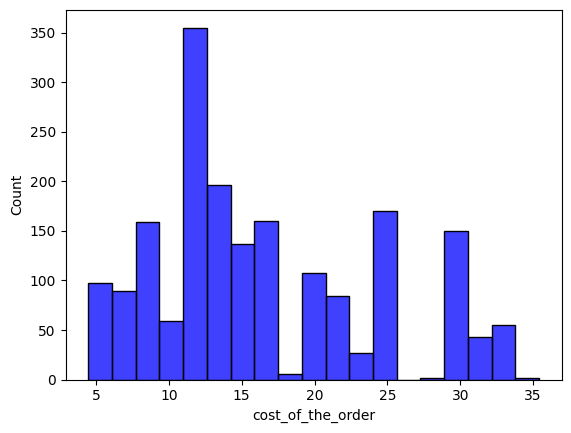

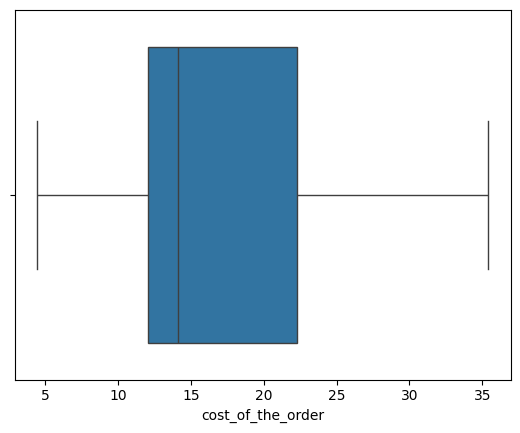

In [18]:
# Histogram for the cost of order
sns.histplot(df, x='cost_of_the_order',color='blue');
plt.show()
# Boxplot for the cost of order
sns.boxplot(df,x='cost_of_the_order')
plt.show()


*  The distribution is skewed towards right.
*  There are no outliers present in this column.
* 50% of the orders cost about 14dollars and 75% of all orders cost less than 22 dollars





Observation on Rating

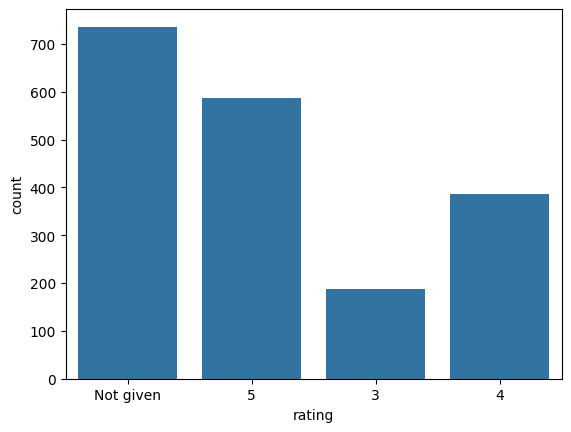

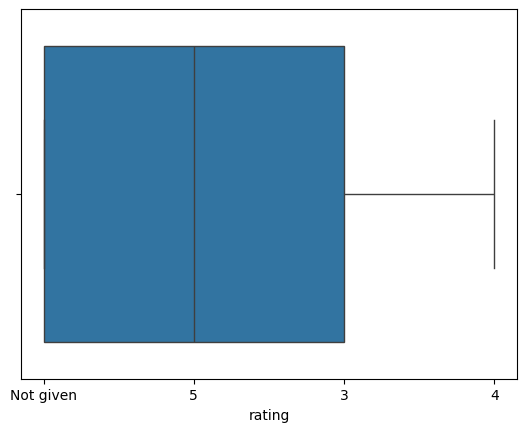

In [19]:
#bar graph for 'rating' column
sns.countplot(df, x = 'rating');
plt.show()
sns.boxplot(df, x = 'rating');
plt.show()


*   Distribution os right skewed
*   Not given has the most number of orders
*   50 % of the customers rated their orders 5 star



Observation for delivery time

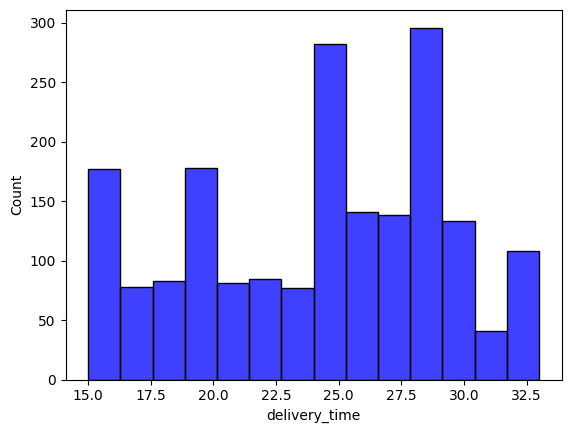

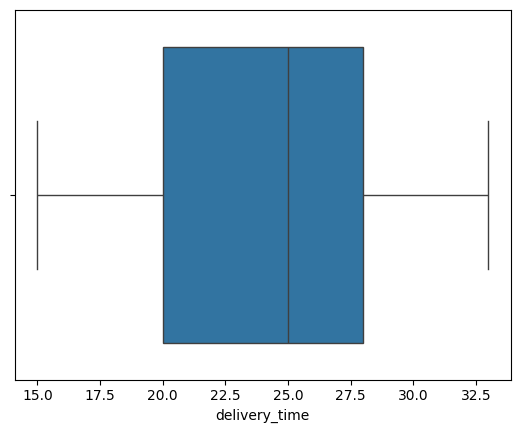

In [20]:
# Histogram for delivery time
sns.histplot(data=df, x='delivery_time',color='blue');
plt.show()
# Boxplot for delivery time
sns.boxplot(data=df,x='delivery_time')
plt.show()


*   The distribution is skewed to the left and there are no outliers in the column
* With 50 % of the delivery time about 25 minutes and 75 % of the delivery time lessthan 28 minutes  

Observation for the food preparation time

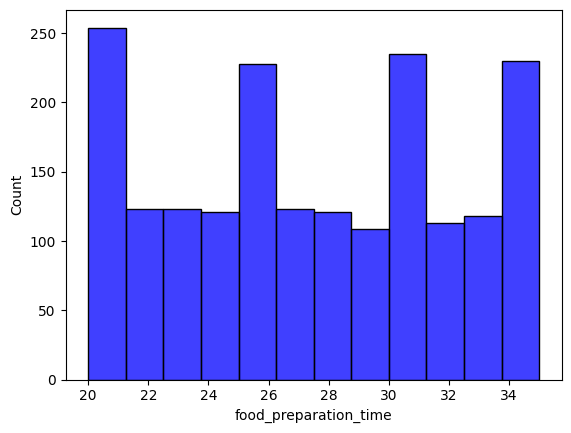

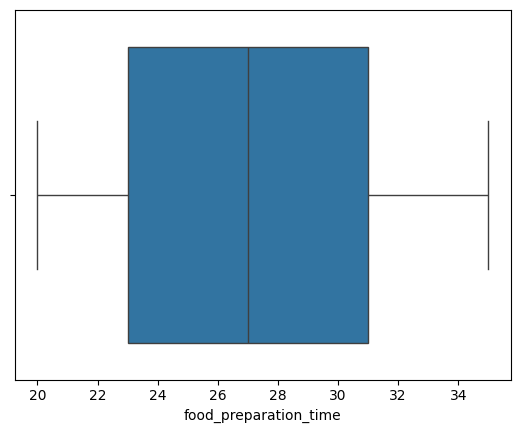

In [21]:
# Histogram for the food preparation time
sns.histplot(data=df, x='food_preparation_time',color='blue');
plt.show()
# Boxplot for the food preparation time
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

* The distribution is normal with food preparation time from 20 minutes to 34 minutes
* There are no outliers in the column
* 50 % of the preparation time was  about 27 minutes

# Exploring the categorical columns

Observation for Day of the week

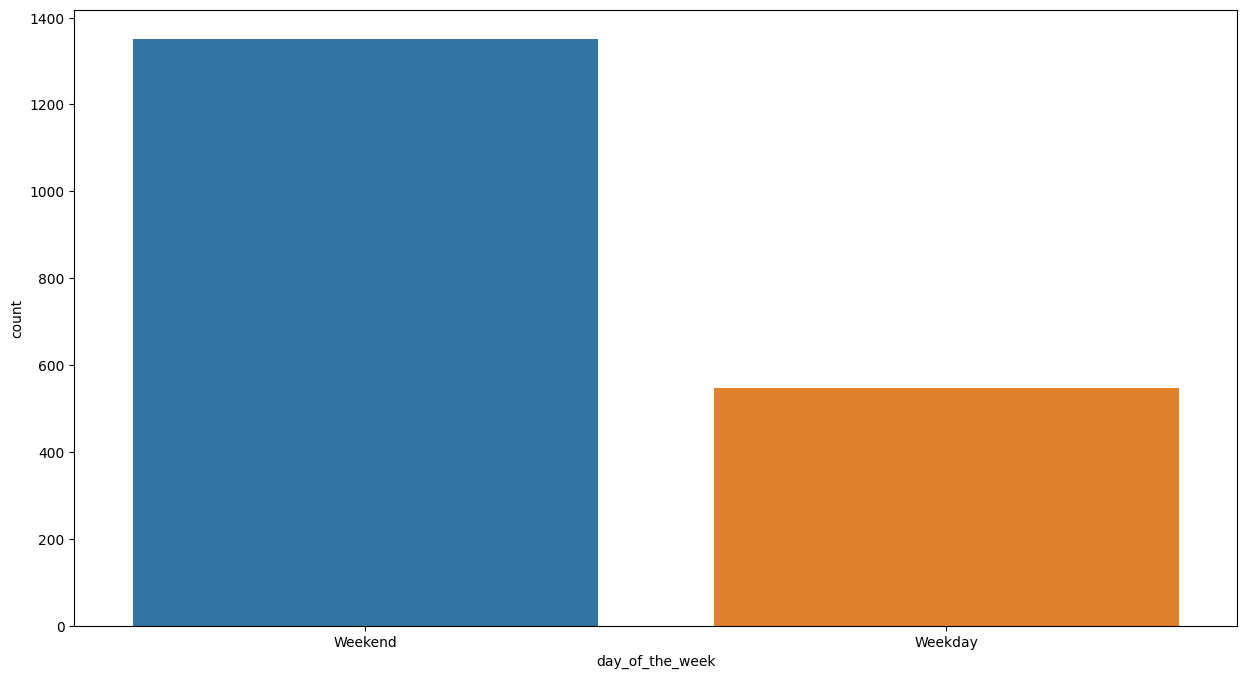

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='day_of_the_week', hue = 'day_of_the_week');

Observation: Most orders were placed on weekends with about 60 % of the total orders

Observation for Cuisine type

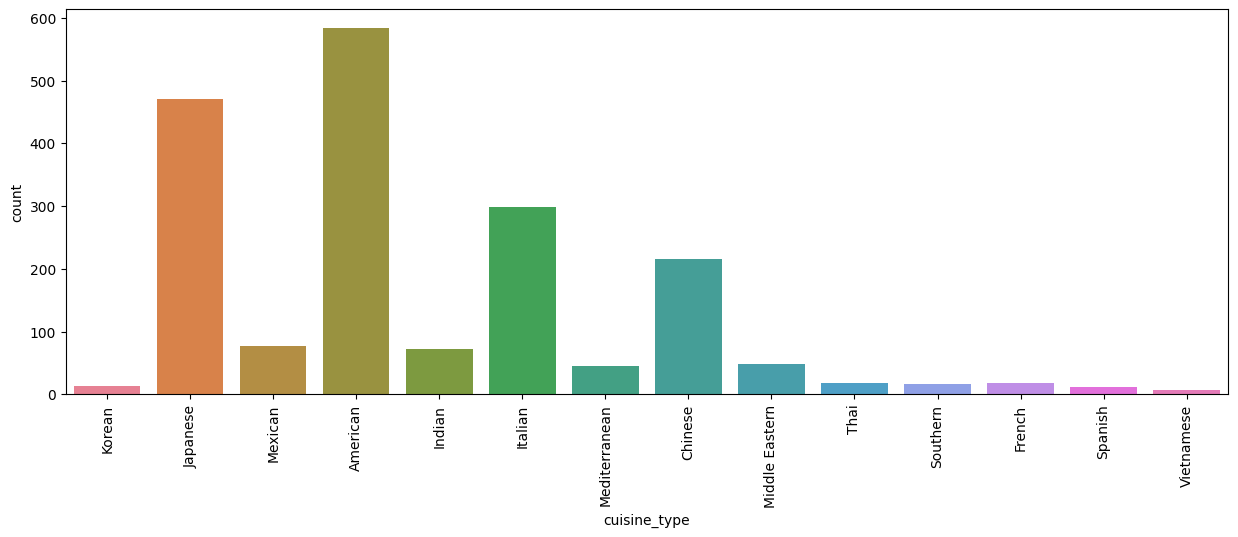

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type', hue = 'cuisine_type')
plt.xticks(rotation=90);

* American cuisine are the most popular with making over 30 % of the total count
* The Italian, Japanese and Chinese cuisine makes about 55 % of the total count
* The Vietnamese cuisines are the leat popular with less than 1 % of the total count

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [24]:
##top_5_restaurant with highest number of orders
top_5_restaurant = df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False).reset_index() # reset_index will reset the index of dataframe to default indexing (0 to number of rows minus 1)
top_5_restaurant.head()


,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
The top 5 restaurant has number of order between 219 and 68, where Shake Shack restaurant ranks first and Parm ranks 5th

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [25]:
#Popular cuisine on weekends
Popular_cuisine = df[(df['day_of_the_week'] == "Weekend")]
Popular_cuisine['cuisine_type'].value_counts().sort_values(ascending=False).reset_index().head()



,index,cuisine_type
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53


* The American cuisine is the most popular with 415 orders compared to others

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
#Calculating the perentage of orders >20 dollars
order_cost_above_20dollars = (((df['cost_of_the_order']>20).sum()) / df['cost_of_the_order'].count())*100
print(round(order_cost_above_20dollars,2), '% of the orders cost more than 20 dollars')


29.24 % of the orders cost more than 20 dollars


#### Observations:
We have 29.24 % of the orders greater than $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
#Calculating the average delivery time
mean_order_deivery_time = round(df['delivery_time'].mean(), 2)
print('mean_order_deivery_time is :', mean_order_deivery_time)

mean_order_deivery_time is : 24.16


#### Observations:
The mean order delivery time is 24minute and 16seconds

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
#Filtering the top 3 customers with the higher number of orders
top_3_customers = df.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False).reset_index() # reset_index will reset the index of dataframe to default indexing (0 to number of rows minus 1)
top_3_customers .head(3)

,customer_id,order_id
0,52832,13
1,47440,10
2,83287,9


#### Observations:
The top 3 customers and their IDs are 52832 with 13 orders, 47440 with 10 orders and 83287 with 9 orders. They will recieve 20% discount vouchers

### Multivariate Analysis

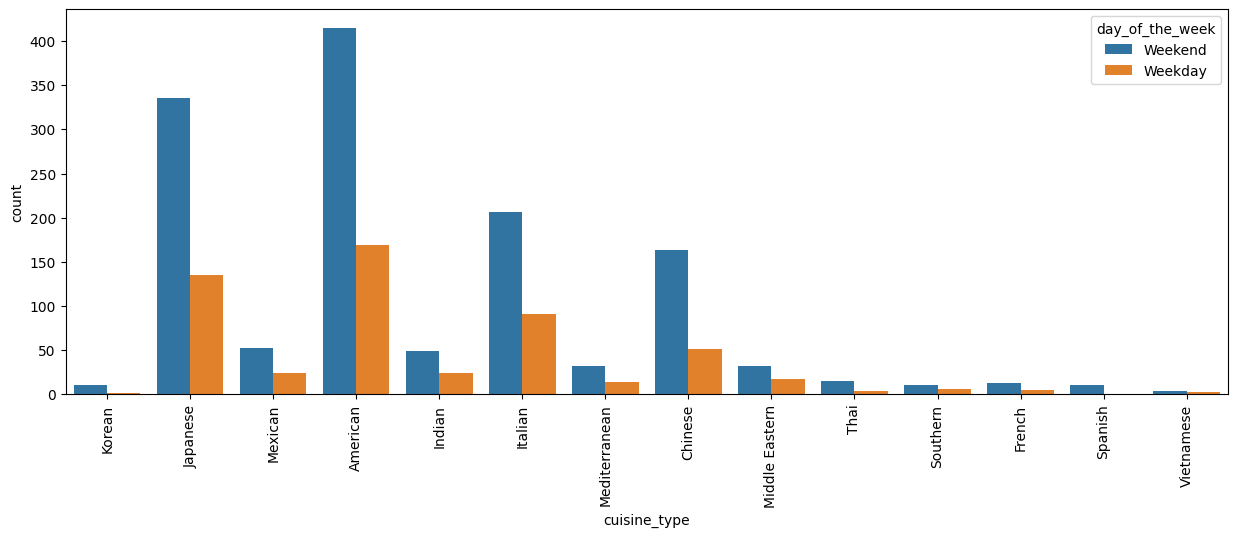

In [29]:
#Checking the relationship between Cuisine type and the day of the week
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week')
plt.xticks(rotation=90);

* Weekend shows high counts of orders across all the Cuisine types
* American cuisines have the highest orders both on weekends and weekdays, followed by the Japanese, Italian and Chinese cuisine
* Vietnamese cuisines have the least order number on both days of the week

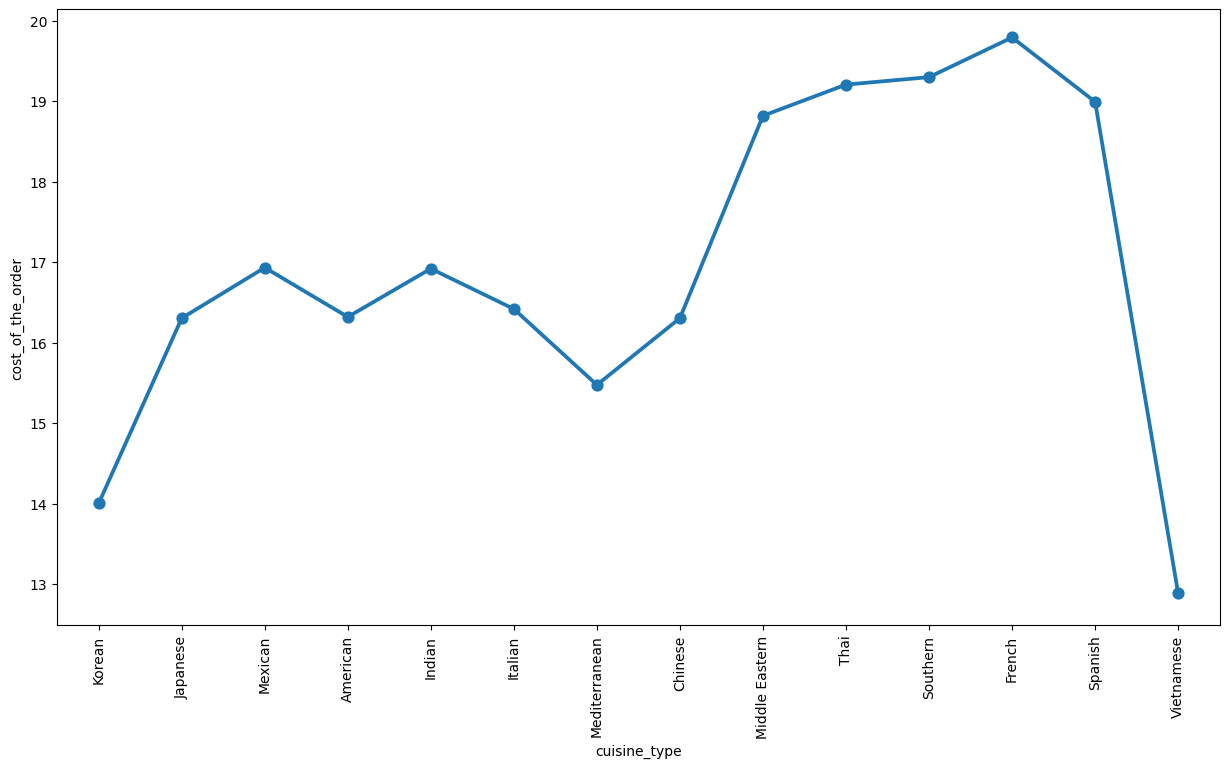

In [30]:
#Checking relationship between cost of order and cuisine type
plt.figure(figsize=(15,8))
sns.pointplot(data=df, x='cuisine_type', y='cost_of_the_order' , errorbar=('ci', False), estimator='mean')
plt.xticks(rotation=90);

* French cuisine are costliest as compared to any others
* It is interesting to observe that the Middle Eastern, Thai, Southern and Spanish cuisines are also costlier, and this can be the reason why food order is less frequent here. same as the French Cuisines
* Although, the American, Japanese, Italian and Chinese cuisines are costlier, there are more frequency of orders compared to the French cuisine.
* Cost between 16-17 dollars are observed to have higher orders than costs greater than 17 dollars while cost below 15 dollars have lower order frequency with Vietnamese cuisines being the lowest

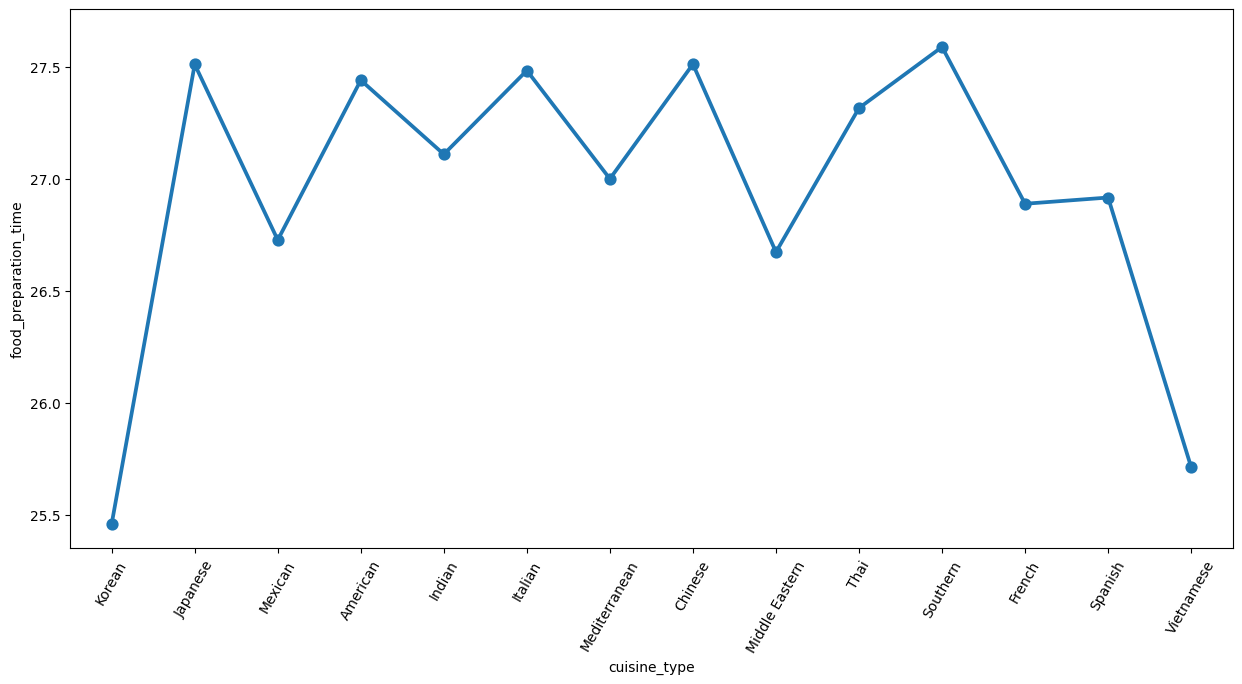

In [31]:
# Checking the relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.pointplot(data=df, x='cuisine_type', y='food_preparation_time', errorbar = ('ci', False)), #estimator ='average')
plt.xticks(rotation = 60)
plt.show()

* The American, Japanese, Italian and Chinese cuisines have higher cook time compared to other with an exemption to the southern cuisine.
*Cook time were lowest for the Korean and Vietnamese cuisines

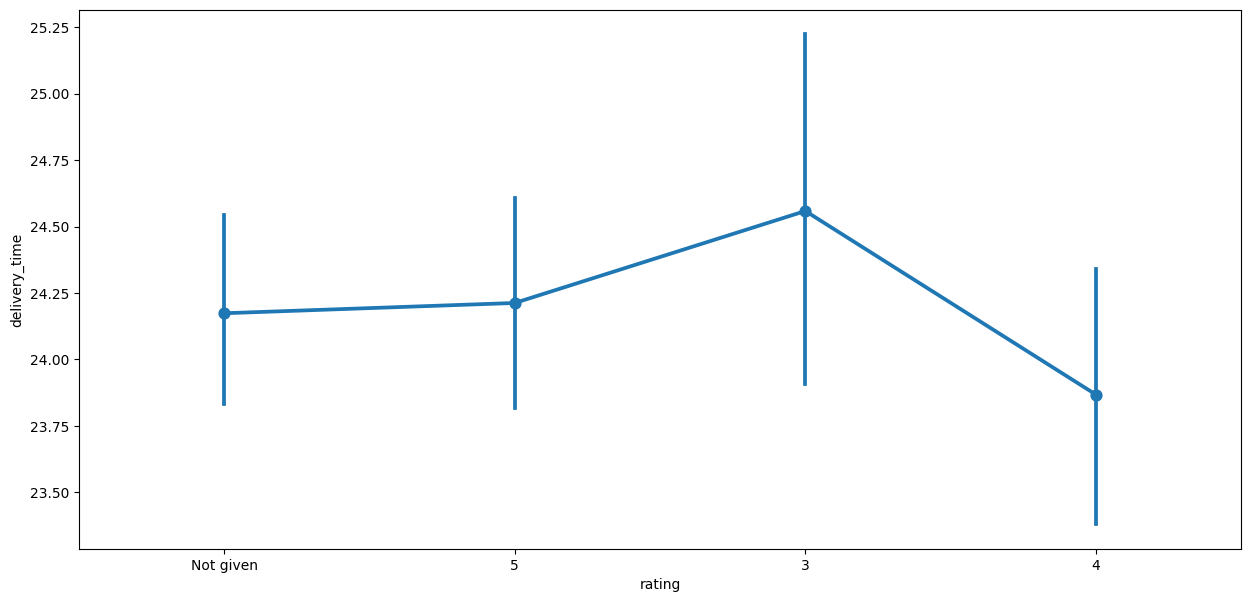

In [32]:
# Checking relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(df, x = 'rating', y = 'delivery_time')
plt.show()

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


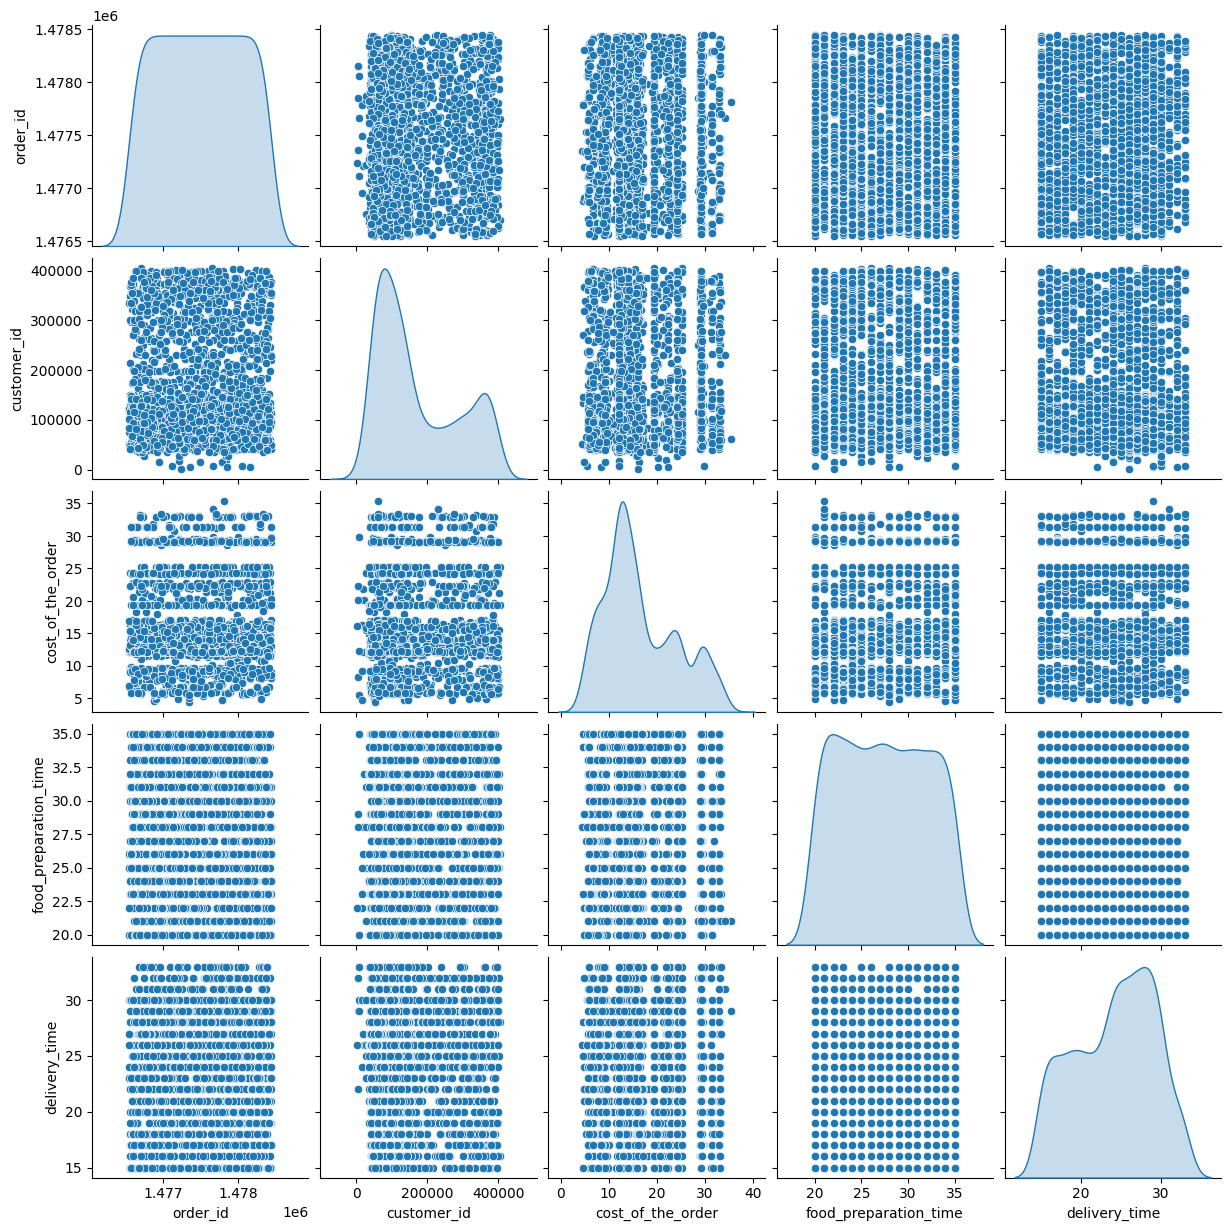

In [33]:
sns.pairplot(data=df, diag_kind="kde")
plt.show();

<ipython-input-34-482771fcab31>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


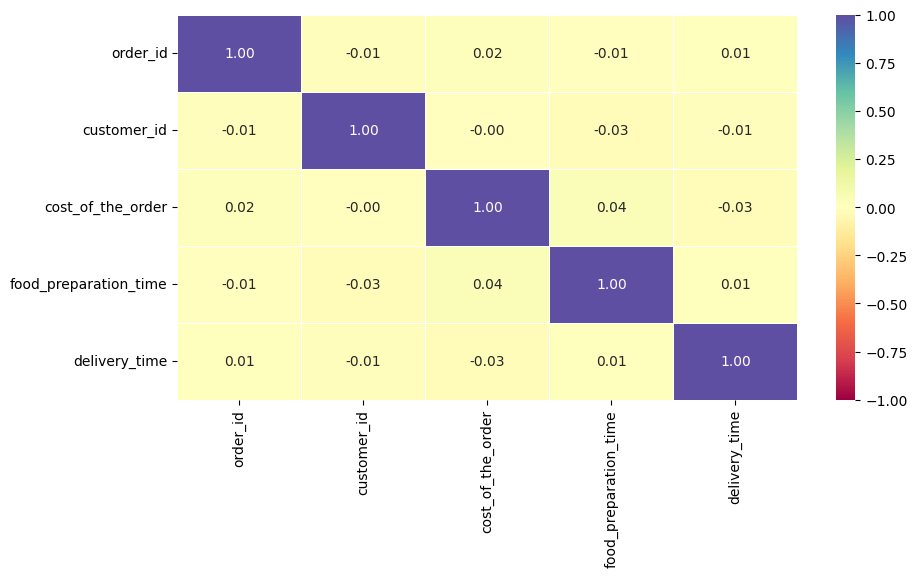

In [34]:
#checking for correlation among variables
corr = df.corr()

# plot the heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, linewidths=.5, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();


* There are no correlation between these variables hence no significant relationship beteen them.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [40]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[(df_rating_count.rating >50)]['restaurant_name']
# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
df_mean_4.groupby(['restaurant_name']).mean().sort_values( by='rating', ascending = False).reset_index().dropna()


<ipython-input-40-906b8974e016>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_4.groupby(['restaurant_name']).mean().sort_values( by='rating', ascending = False).reset_index().dropna()


,restaurant_name,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
0,The Meatball Shop,1477534.976,162298.167,17.805,4.512,27.250,24.905
1,Blue Ribbon Fried Chicken,1477503.172,189861.219,17.665,4.328,26.984,24.172
2,Shake Shack,1477567.594,192110.774,16.731,4.278,28.090,24.677
3,Blue Ribbon Sushi,1477433.055,163476.507,16.036,4.219,27.671,23.260


#### Observations:
The following restaurants have ratings over 50 and average rating of 4:
1. The Meatball Shop
2. Blue Ribbon Fried Chicken
3. Shake Shack
4. Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [37]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
#the net revenue generated by the company across all orders

print('The net revenue generated by the company across all orders = ', df.Revenue.sum())


The net revenue generated by the company across all orders =  6166.303


#### Observations:
A net revenue of  $ 6166.303 was generated across all orders by the company

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [38]:
# create a df for the sum of food preparation time and delivery time
df['Total_time_to_deliver'] = df['food_preparation_time']+ df['delivery_time']

print(round((df[df['Total_time_to_deliver']>60].count()[0] / df.count()[0]*100),2) , '% of orders take more than 60 minutes to get delivered from the time the order is placed')

#df['food_preparation_time']['delivery_time']

10.54 % of orders take more than 60 minutes to get delivered from the time the order is placed



#### Observations:
Only 10.54 % of the total order takes more than 60 minutes to deliver , including time to prepare

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [39]:
#Checking the mean delivery time for weekdays and weekends
df.groupby(['day_of_the_week'])['delivery_time'].mean().sort_values(ascending=True).reset_index()

,day_of_the_week,delivery_time
0,Weekend,22.470
1,Weekday,28.340


#### Observations:
The average delivery time for weekdays is 26 % higher than the delivery time for weekends. This means orders get delivered faster on weekends than weekdays by aproximately 21%

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Food deliveries tend to be higher across all cuisines during the weekends
*  There are 4 most peferred cuisines in Newyork which are the  American, Italian, japanese and Chinese
* Cost of the order, Food preparation and delivery time is an important factor in peoples choice of order
* Upto 60 % of the orders were not rated

### Recommendations:

* The American Cuisine along with Italian, Japanese and Chinese Cuisine have more orders and drive higher revenue, hence the company should focus more on these cuisines and increase potentials to deliver faster on weekends
* Since rating are given based on delivery time , incentives can be introduced to encourage riders who deliver ontime and customers who rate their orders
* There are more orders on weekends, incentives or discounts to encourage customers to buy more should be introduced


---